## Observations and Insights 

Observation 1 : 
By observing the results in the Box and whisker plot titled "Tumor Volume Per Drug Regimen", you can assume that Ramicane
and Capomulin performed better as their final tumor volume data lies in lower ranges than Ceftamin and Infubinol. Ceftamin    did have one outlier of a mouse that had a smaller final tumor volume. In addition to the analysis we have done, I would be     interested to see a box and whisker plot of the difference between start and final tumor volumns for each drug.


Observation 2 :
As weight in mice subjects increases, so does average tumor size. 


Final Observation: 
From the plots and data reqeusted, I would have to say that the Capomulin Treatment had the best results by decreasing the tumor size to about 35 percent, from the earliest timepoint, t the latest timepoint.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import sem
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [2]:
# Combine the data into a single dataset
mouse_data_df = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='outer')

# Display the data table for preview
mouse_data_df.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [3]:
# Checking the number of mice.
mouse_data_df['Mouse ID'].nunique()

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

# first creating a data set grouped by the Mouse ID 
duplicate = mouse_data_df.groupby('Mouse ID')

# finding the count of each singular Timepoint by Mouse ID
duplicate = duplicate['Timepoint'].value_counts()

# identifying which Timepoint occurs more than once per Mouse ID
duplicate = pd.DataFrame(duplicate)
duplicate = duplicate.loc[ duplicate['Timepoint'] > 1 ]
duplicate = duplicate.index.values[0][0]

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_data_df.loc[ mouse_data_df['Mouse ID'] == duplicate, : ]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_data_df = mouse_data_df.loc[ mouse_data_df['Mouse ID'] != duplicate ]

In [7]:
# Checking the number of mice in the clean DataFrame.
mouse_data_df['Mouse ID'].nunique()

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_df = mouse_data_df.groupby('Drug Regimen')

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean = regimen_df[['Tumor Volume (mm3)']].mean().rename(columns = {'Tumor Volume (mm3)': 'Mean'})
median = regimen_df[['Tumor Volume (mm3)']].median().rename(columns = {'Tumor Volume (mm3)': 'Median'})
variance = regimen_df[['Tumor Volume (mm3)']].var().rename(columns = {'Tumor Volume (mm3)' : 'Variance'})
std = regimen_df[['Tumor Volume (mm3)']].std().rename(columns= {'Tumor Volume (mm3)': 'Standard Deviation'}) 
sem = regimen_df[['Tumor Volume (mm3)']].sem().rename(columns= {'Tumor Volume (mm3)' : 'Standard Error of Mean'}) 

# Assemble the resulting series into a single summary dataframe.
regimen_df = pd.concat([round(mean, 2), round(median, 2), round(variance, 2), round(std, 2), round(sem, 2)], axis = 1)

regimen_df

,Mean,Median,Variance,Standard Deviation,Standard Error of Mean
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line 
regimen_df_2 = mouse_data_df.groupby('Drug Regimen').agg(Mean=('Tumor Volume (mm3)','mean'), Median=('Tumor Volume (mm3)','median'), Variance=('Tumor Volume (mm3)','var'), Standard_Deviation = ('Tumor Volume (mm3)','std'),Standard_Error_of_Means=('Tumor Volume (mm3)','sem')).round(2)

regimen_df_2

,Mean,Median,Variance,Standard_Deviation,Standard_Error_of_Means
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

[Text(0, 0, 'Capomulin'),
 Text(0, 0, 'Ceftamin'),
 Text(0, 0, 'Infubinol'),
 Text(0, 0, 'Ketapril'),
 Text(0, 0, 'Naftisol'),
 Text(0, 0, 'Placebo'),
 Text(0, 0, 'Propriva'),
 Text(0, 0, 'Ramicane'),
 Text(0, 0, 'Stelasyn'),
 Text(0, 0, 'Zoniferol')]

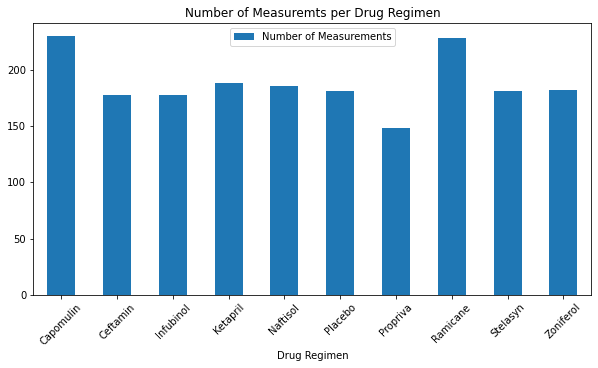

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
measurements_df = mouse_data_df.groupby('Drug Regimen')

# since each record is a measurement, I will just count the Mouse Id's per Drug Regimin
measurements_df = measurements_df[['Mouse ID']].count()

# rename the column for representation
measurements_df = measurements_df.rename(columns={'Mouse ID':'Number of Measurements'})
x_axis = list(measurements_df.index)

#creating the bar chart
plot = measurements_df.plot(kind='bar', figsize=(10,5), title='Number of Measuremts per Drug Regimen') 
plot.set_xticklabels(x_axis, rotation=45)

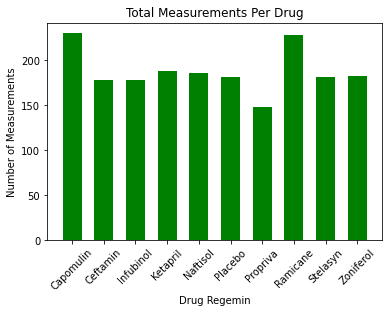

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
x_axis = measurements_df.index
y_axis = measurements_df['Number of Measurements']

plt.bar(x_axis, y_axis, width=0.6, color='g')
plt.title('Total Measurements Per Drug')
plt.xlabel('Drug Regemin')
plt.ylabel('Number of Measurements')
plt.xticks(x_axis, rotation='45')
plt.show()

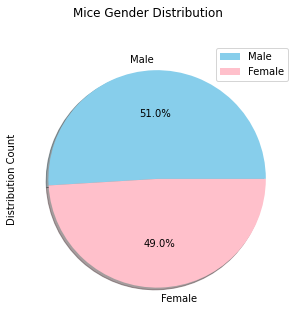

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
male_count = mouse_data_df[mouse_data_df['Sex'] == 'Male'].count()[0]
female_count = mouse_data_df[mouse_data_df['Sex'] == 'Female'].count()[0]

gender_count_df = pd.DataFrame(
        {'Gender' : ['Male', 'Female'],
        'Distribution Count' : [male_count, female_count]}
)

gender_count_df = gender_count_df.set_index('Gender')
plot = gender_count_df.plot(
            kind ='pie', 
            subplots = True,
            shadow = True,
            figsize = (10, 5),
            legend = True,
            colors = ('skyblue', 'pink'),
            title = 'Mice Gender Distribution', 
            autopct ='%1.1f%%'
)

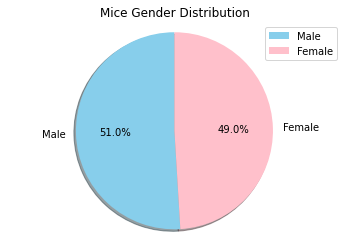

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
genders = gender_count_df.index
counts = gender_count_df['Distribution Count']
colors = ['skyblue', 'pink']

plt.title("Mice Gender Distribution")
plt.pie(
    counts,
    labels = genders,
    colors = colors,
    autopct = "%1.1f%%", 
    shadow = True, 
    startangle = 90
)
plt.legend()
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
mouse_df_drug_spec = mouse_data_df[
                        (mouse_data_df['Drug Regimen'] == 'Capomulin') |
                        (mouse_data_df['Drug Regimen'] == 'Ramicane')  |
                        (mouse_data_df['Drug Regimen'] == 'Infubinol') |
                        (mouse_data_df['Drug Regimen'] == 'Ceftamin')  ]

# grouping by the mouse 
grp = mouse_df_drug_spec.groupby('Mouse ID')

# getting the last (greatest) timepoint for each mouse
mouse_grouped_df = grp[['Timepoint']].max()

# Merging this group df with the original dataframe to get the tumor volume at the last timepoint
mouse_df_last_tumor_volume = pd.merge(mouse_grouped_df, mouse_df_drug_spec, on=['Mouse ID', 'Timepoint'])
mouse_df_last_tumor_volume

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,6,27,68.594745,4
96,y793,45,Capomulin,Male,17,17,31.896238,2
97,y865,45,Ceftamin,Male,23,26,64.729837,3
98,z578,45,Ramicane,Male,11,16,30.638696,0


In [15]:
drug_regimen = mouse_df_last_tumor_volume['Drug Regimen'].unique()

drug = []
tumor_volume = []

for i in drug_regimen:
    tumor_volume.append(mouse_df_last_tumor_volume.loc[mouse_df_last_tumor_volume['Drug Regimen'] == i, 'Tumor Volume (mm3)'].values)
    drug.append(i)

tumor_volume_df = pd.DataFrame({drug[0] : tumor_volume[0],
                                drug[1] : tumor_volume[1],
                                drug[2] : tumor_volume[2],
                                drug[3] : tumor_volume[3]})   
    
infubinol_vol = tumor_volume_df.iloc[:,0] 
ceftamin_vol  = tumor_volume_df.iloc[:,1] 
ramicane_vol  = tumor_volume_df.iloc[:,2]
capomulin_val = tumor_volume_df.iloc[:,3]


#quartiles and iqr for infubinol
quartiles = infubinol_vol.quantile([.25, .5, .75])
lower_quartile = quartiles[.25]
upper_quartile = quartiles[.75]
iqr = upper_quartile - lower_quartile

lower = lower_quartile - (1.5 * iqr)
upper = upper_quartile + (1.5 * iqr)

outliers = tumor_volume_df[ (tumor_volume_df['Infubinol'] < lower) | (tumor_volume_df['Infubinol'] > upper) ] ['Infubinol']

if len(outliers) < 1:
    print("There are no outliers tumor volumes for the Infubinol drug")
else:
    print('The outlier(s) tumor volume(s) for Infubinol are:')
    for i in outliers:
        print(round(i,2))   
        
        
#quartiles and iqr for ceftamin
quartiles = ceftamin_vol.quantile([.25, .5, .75])
lower_quartile = quartiles[.25]
upper_quartile = quartiles[.75]
iqr = upper_quartile - lower_quartile

lower = lower_quartile - (1.5 * iqr)
upper = upper_quartile + (1.5 * iqr)

outliers = tumor_volume_df[ (tumor_volume_df['Ceftamin'] < lower) | (tumor_volume_df['Ceftamin'] > upper) ] ['Ceftamin']

if len(outliers) < 1:
    print("There are no outlier tumor volumes for the Ceftamin drug")
else:
    print('The outlier(s) tumor volume(s) for Ceftamin are:')
    for i in outliers:
        print(round(i,2))

        
#quartiles and iqr for ramicane
quartiles = ramicane_vol.quantile([.25, .5, .75])
lower_quartile = quartiles[.25]
upper_quartile = quartiles[.75]
iqr = upper_quartile - lower_quartile

lower = lower_quartile - (1.5 * iqr)
upper = upper_quartile + (1.5 * iqr)

outliers = tumor_volume_df[ (tumor_volume_df['Ramicane'] < lower) | (tumor_volume_df['Ramicane'] > upper) ] ['Ramicane']


if len(outliers) < 1:
    print("There are no outlier tumor volumes for the Ramicane drug")
else:
    print('The outlier(s) volume(s) for Ramicane are:')
    for i in outliers:
        print(round(i,2))
    
    
#quartiles and iqr for capomulin
quartiles = capomulin_val.quantile([.25, .5, .75])
lower_quartile = quartiles[.25]
upper_quartile = quartiles[.75]
iqr = upper_quartile - lower_quartile
   
lower = lower_quartile - (1.5 * iqr)
upper = upper_quartile + (1.5 * iqr)

outliers = tumor_volume_df[ (tumor_volume_df['Capomulin'] < lower) | (tumor_volume_df['Capomulin'] > upper) ] ['Capomulin']  


if len(outliers) < 1:
    print("There are no outlier tumor volumes for the Capomulin drug")
else:
    print('The outlier(s) tumor volume(s) for Capomulin are:')
    for i in outliers:
        print(round(i,2))
  

The outlier(s) tumor volume(s) for Infubinol are:
36.32
There are no outlier tumor volumes for the Ceftamin drug
There are no outlier tumor volumes for the Ramicane drug
There are no outlier tumor volumes for the Capomulin drug


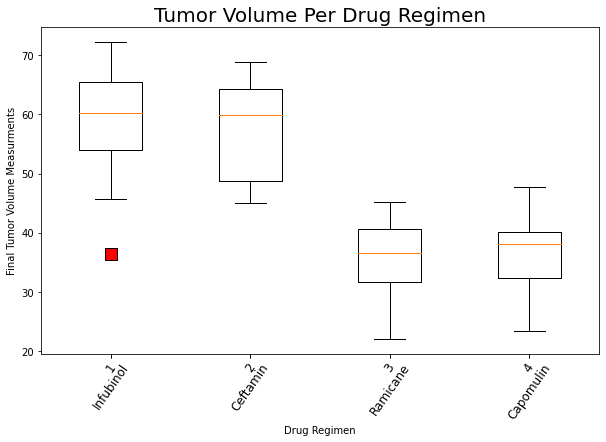

In [16]:
fig, ax = plt.subplots(figsize=(10, 6)) 
plt.xticks([1, 2, 3, 4], drug, size =12, rotation=55)
  
flierprops = dict(marker='s', markersize=12, markerfacecolor='red')    

# Creating plot 
bp = ax.boxplot(tumor_volume,flierprops=flierprops)

plt.title('Tumor Volume Per Drug Regimen', size=20)
plt.xlabel('Drug Regimen', size = 10)
plt.ylabel('Final Tumor Volume Measurments')
fig.align_labels()
  
# show plot to identify the outliers
plt.show() 

## Line and Scatter Plots

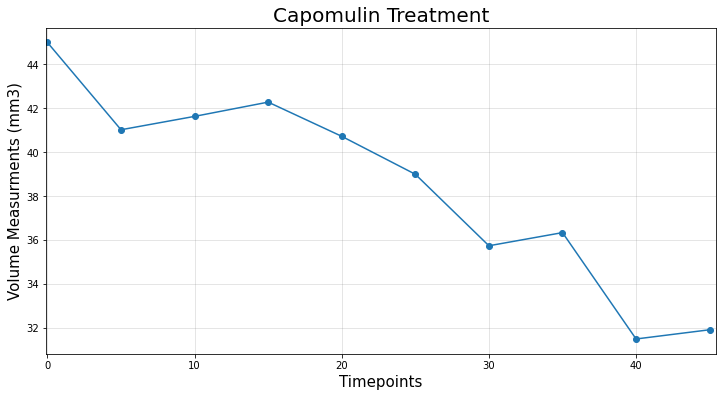

In [17]:
# Generating a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# Retrieving my specimen by just randomly picking the max Mouse ID of a mouse that was treated with the Capomulin drug.
specimen = mouse_data_df[mouse_data_df['Drug Regimen'] == 'Capomulin']['Mouse ID'].max()
specimen_df = mouse_data_df[mouse_data_df['Mouse ID'] == specimen]
specimen_df=specimen_df[['Timepoint','Tumor Volume (mm3)']]

x_timepoints=[]
y_tumor_volume=[] 

for m in range(len(specimen_df)):
    x_timepoints.append(specimen_df.iloc[m,0])
    y_tumor_volume.append(round(specimen_df.iloc[m,1],2))

plt.figure(figsize=(12,6))
plt.plot(x_timepoints,y_tumor_volume, marker='o')
plt.title('Capomulin Treatment',size = 20)
plt.xlim(-0.1, 45.4)
plt.xlabel('Timepoints', size = 15)
plt.ylabel('Volume Measurments (mm3)',size = 15)
plt.grid(color='grey', linestyle='-', linewidth=1, alpha=0.2)
plt.show()

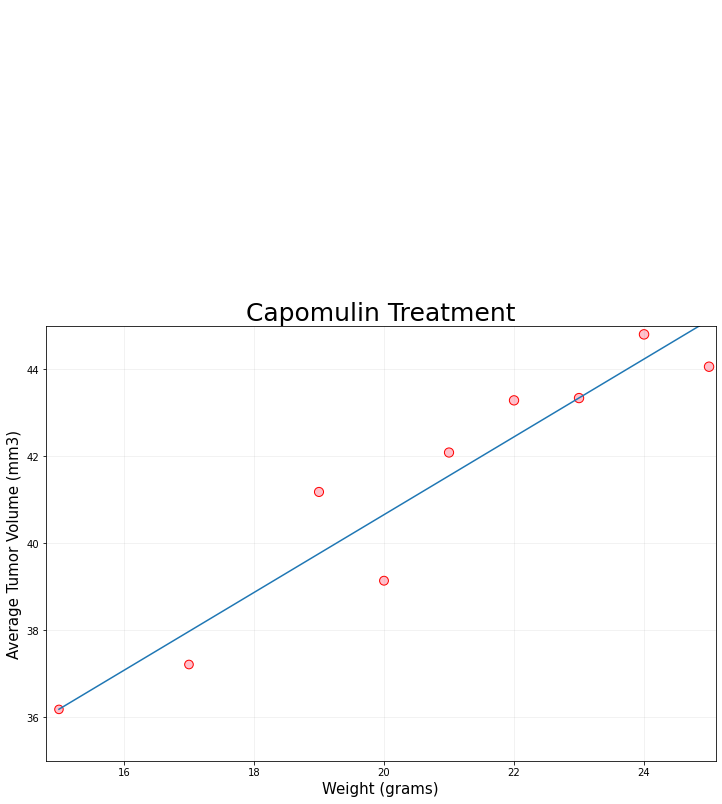

In [18]:
# Generating a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
weight_grp = mouse_data_df[mouse_data_df['Drug Regimen'] == 'Capomulin'].groupby('Weight (g)').agg(Average_Volume=('Tumor Volume (mm3)','mean'))

weight = []
volume = []
size = []

for v in range(len(weight_grp)):
    weight.append(weight_grp.index[v])
    volume.append(weight_grp.iloc[v, 0])
    size.append(weight_grp.iloc[v,0] * 2)
    
plt.figure(figsize=(12,8))
plt.title('Capomulin Treatment',size = 25)
plt.xlabel('Weight (grams)', size = 15)
plt.ylabel('Average Tumor Volume (mm3)',size = 15) 
plt.xlim(14.8, 25.1)
plt.ylim(35, 45)
plt.grid(color='grey', linestyle='-', linewidth=1, alpha=0.1)  
plt.scatter(weight, volume , marker='o', facecolors='pink', edgecolor='red', s=(size), alpha=1.0)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight,volume)
line = [i * slope + intercept for i in weight]
equation = "y = " + str(round(slope)) + "x +" + str(round(intercept))
plt.plot(weight, line)
plt.annotate(equation, (16,52), fontsize = 20, color = 'b')
plt.show()

## Correlation and Regression

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
c = st.pearsonr(weight,volume)
print(f" The Correlation Coefficient of the Mouse Weight and Average Tumor Volume is {c[0]}")

 The Correlation Coefficient of the Mouse Weight and Average Tumor Volume is 0.9505243961855269
